[Reference](https://medium.datadriveninvestor.com/your-random-forest-model-is-never-the-best-random-forest-model-you-can-build-e3d0b79080dc)

In [2]:
import seaborn as sns
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

sns.set()

In [3]:
plt.rcParams['font.family'] = []

colors = ['#fe7c73', '#2471A3']

# Create dataset

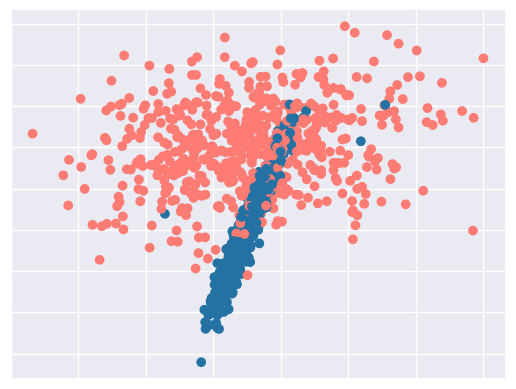

In [4]:
# Generate some synthetic data to train the decision tree on
X, y = make_classification(
    n_samples=1200,
    n_features=2,
    n_clusters_per_class=1,
    n_informative=2, class_sep=0.5,
    n_redundant=0,
    n_repeated=0
)

fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in y])
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

X_train, X_test = X[:1000], X[1000:]
y_train, y_test = y[:1000], y[1000:]

In [5]:
## Train Random Forest Model

model = RandomForestClassifier(max_features="sqrt", max_samples=0.9, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.9, random_state=42)

In [6]:
model.estimators_[:5]

[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542),
 DecisionTreeClassifier(max_features='sqrt', random_state=1273642419),
 DecisionTreeClassifier(max_features='sqrt', random_state=1935803228),
 DecisionTreeClassifier(max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_features='sqrt', random_state=996406378)]

In [8]:
model_accs = [] # list to store accuracies

for idx, tree in enumerate(model.estimators_):

    score = tree.score(X_test, y_test) # find accuracy
    model_accs.append([idx, score]) # store accuracy

model_accs = np.array(model_accs)

In [9]:
# sort on second column in reverse order to obtain sorting order

sorted_indices = np.argsort(model_accs[:, 1])

In [11]:
# Rearrange the rows of the array based on the sorted indices
model_ids = model_accs[sorted_indices][:,0].astype(int)
model_ids[:10]

array([32, 55,  0, 56, 24, 41, 51, 95,  5, 40])

In [12]:
# create numpy array, rearrange the models and convert back to list

model.estimators_ = np.array(model.estimators_)[model_ids].tolist()

In [13]:
result = []
total_models = len(model.estimators_)
for i in range(2, total_models):

    small_model = copy.deepcopy(model)

    small_model.estimators_ = model.estimators_[:i]
    result.append([i, small_model.score(X_test, y_test)])

result = np.array(result)

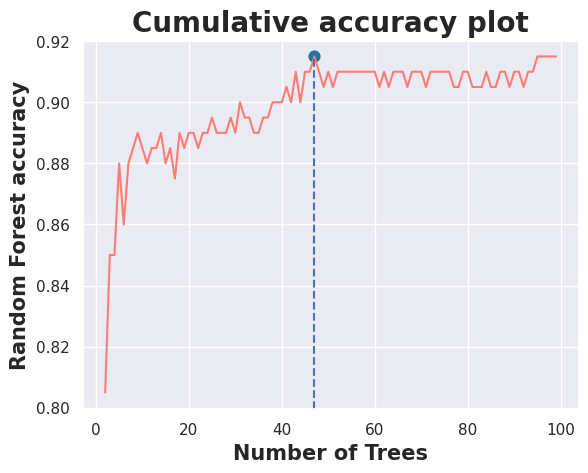

In [14]:
max_index = np.argmax(result[:, 1])

fig, ax = plt.subplots()
ax.plot(result[:, 0], result[:, 1], c = colors[0])
ax.axvline(x=result[max_index][0], ymax=0.95, ls = "--")
plt.scatter([result[max_index][0],], [result[max_index][1],], zorder=0, s=60, c = colors[1])
ax.set_xlabel("Number of Trees", fontsize = 15, fontweight = "bold")
ax.set_ylabel("Random Forest accuracy", fontsize = 15, fontweight = "bold")
ax.set_title("Cumulative accuracy plot", fontsize = 20, fontweight = "bold")
plt.show()

In [15]:
## Create final model

small_model = copy.deepcopy(model)

small_model.estimators_ = model.estimators_[:int(result[max_index][0])]

In [16]:
# Accuracy
model.score(X_test, y_test)

0.915

In [17]:
# Run-time
%timeit model.predict(X_test)

11.4 ms ± 3.37 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
# Accuracy
small_model.score(X_test, y_test)

0.915

In [19]:
# Run-time
%timeit small_model.predict(X_test)

7.05 ms ± 3.67 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
